## Waste Management using CNN Model

In [ ]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


In [4]:
train_path = 'dataset/TRAIN'
test_path = 'dataset/TEST'

In [5]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [01:51<00:00, 89.85it/s] 


In [7]:
data.shape

(22564, 2)

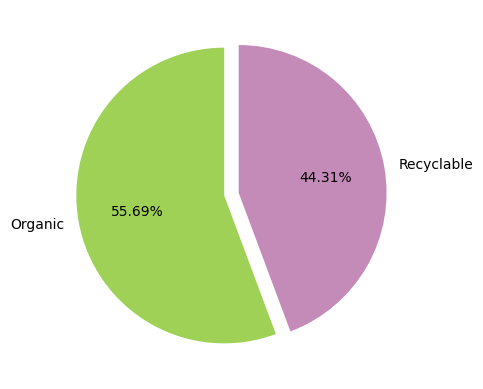

In [8]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels = ['Organic', 'Recyclable'], autopct = '%0.2f%%',
         colors = colors, startangle = 90, explode = [0.05, 0.05])     
plt.show()  

                                               image    label
0  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
1  [[[241, 242, 247], [241, 242, 247], [241, 242,...  TRAIN\O
2  [[[224, 224, 224], [229, 229, 229], [236, 236,...  TRAIN\O
3  [[[255, 255, 255], [255, 255, 255], [255, 255,...  TRAIN\O
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  TRAIN\O
label
TRAIN\O    12565
TRAIN\R     9999
Name: count, dtype: int64


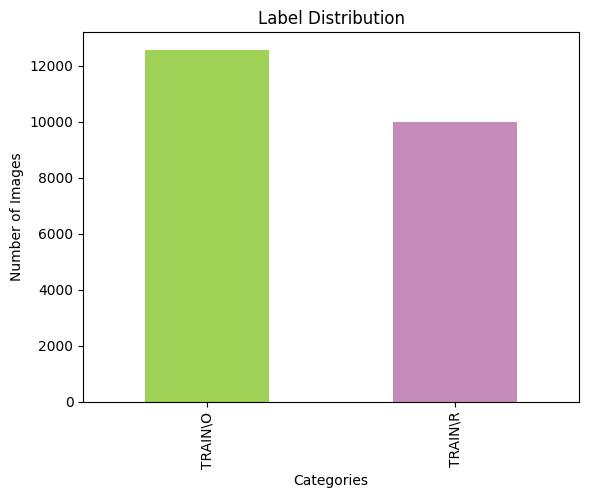

In [13]:
#Self
# Check the first few rows of the DataFrame
print(data.head())

# Check the distribution of the labels
print(data['label'].value_counts())

# Plot the distribution of labels as a bar chart
data['label'].value_counts().plot(kind='bar', color=['#a0d157', '#c48bb8'])
plt.title('Label Distribution')
plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.show()


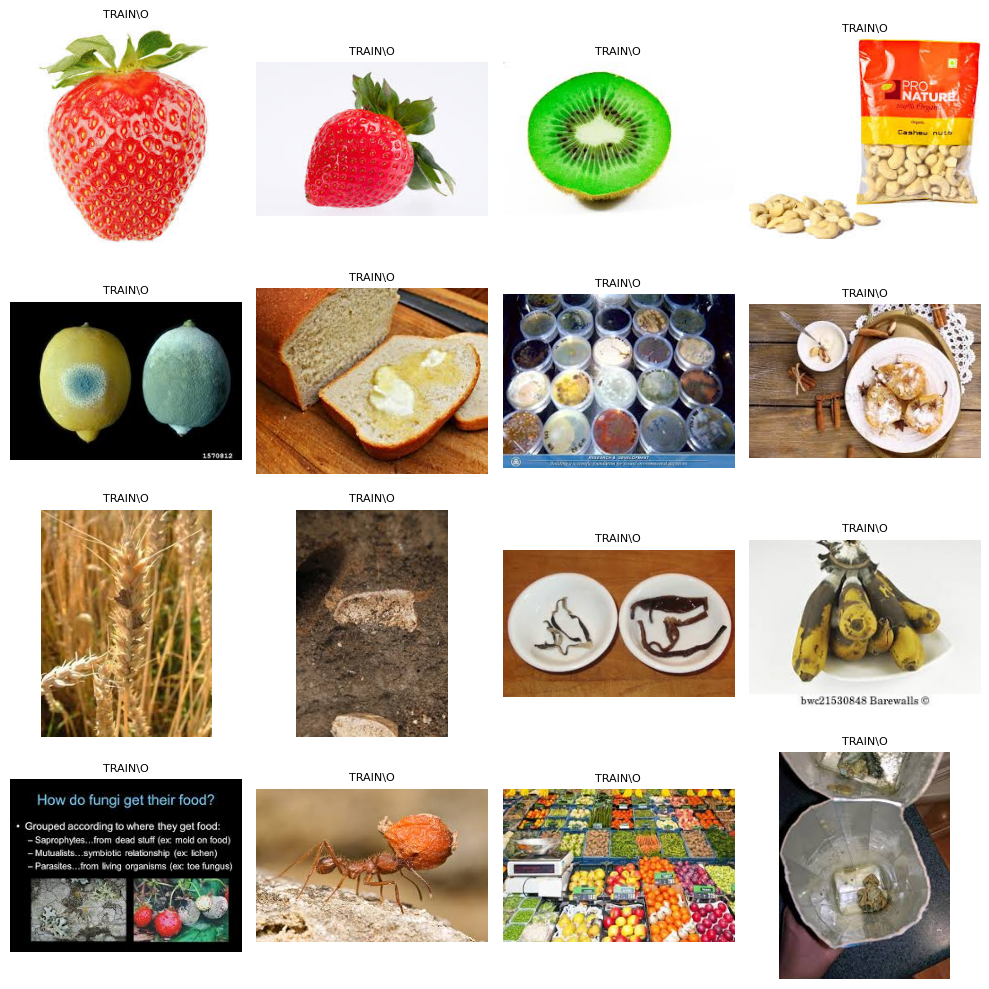

In [ ]:
#Self
import matplotlib.pyplot as plt

# Display a grid of 16 images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_data[i])
    plt.title(y_data[i], fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()


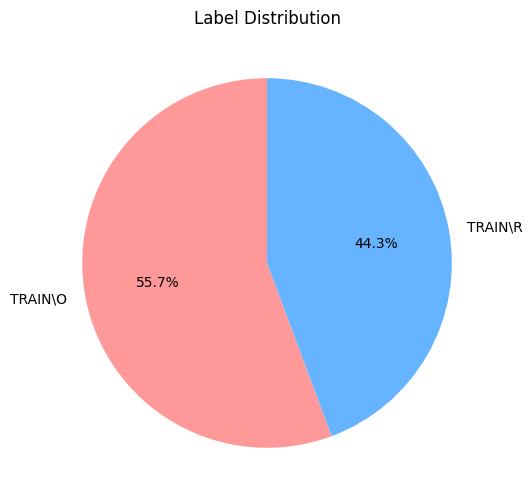

In [ ]:
#Self
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
data['label'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    colors=colors, 
    startangle=90, 
    figsize=(6, 6)
)
plt.title('Label Distribution')
plt.ylabel('')  # Remove the y-axis label for aesthetics
plt.show()

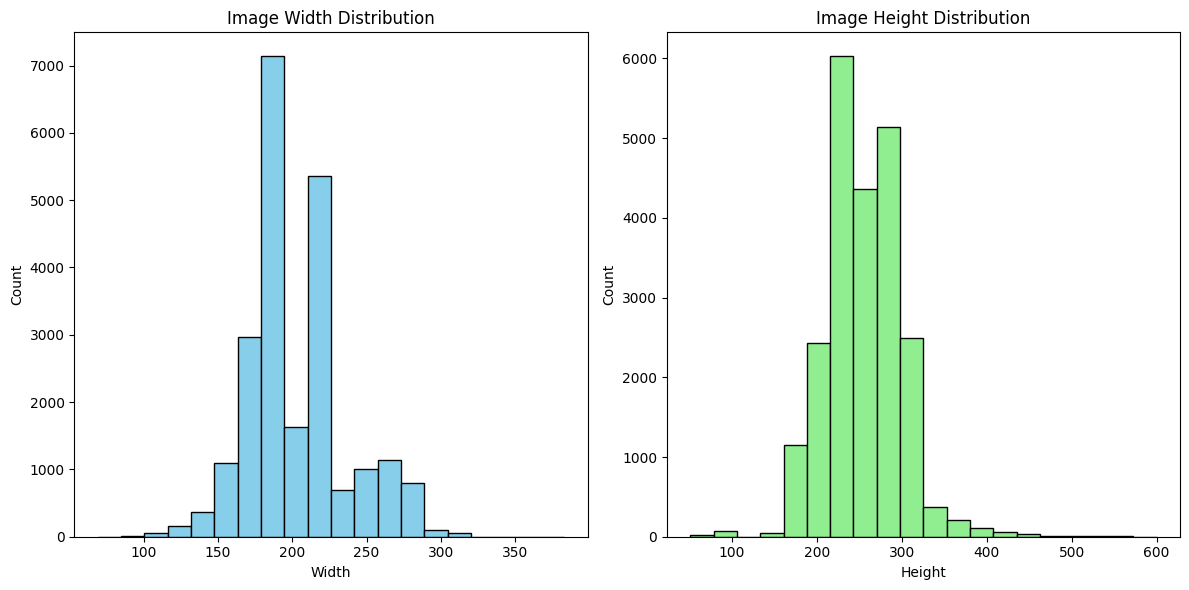

In [ ]:
#Self
image_shapes = [img.shape[:2] for img in data['image']]
widths, heights = zip(*image_shapes)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=20, color='skyblue', edgecolor='black')
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=20, color='lightgreen', edgecolor='black')
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


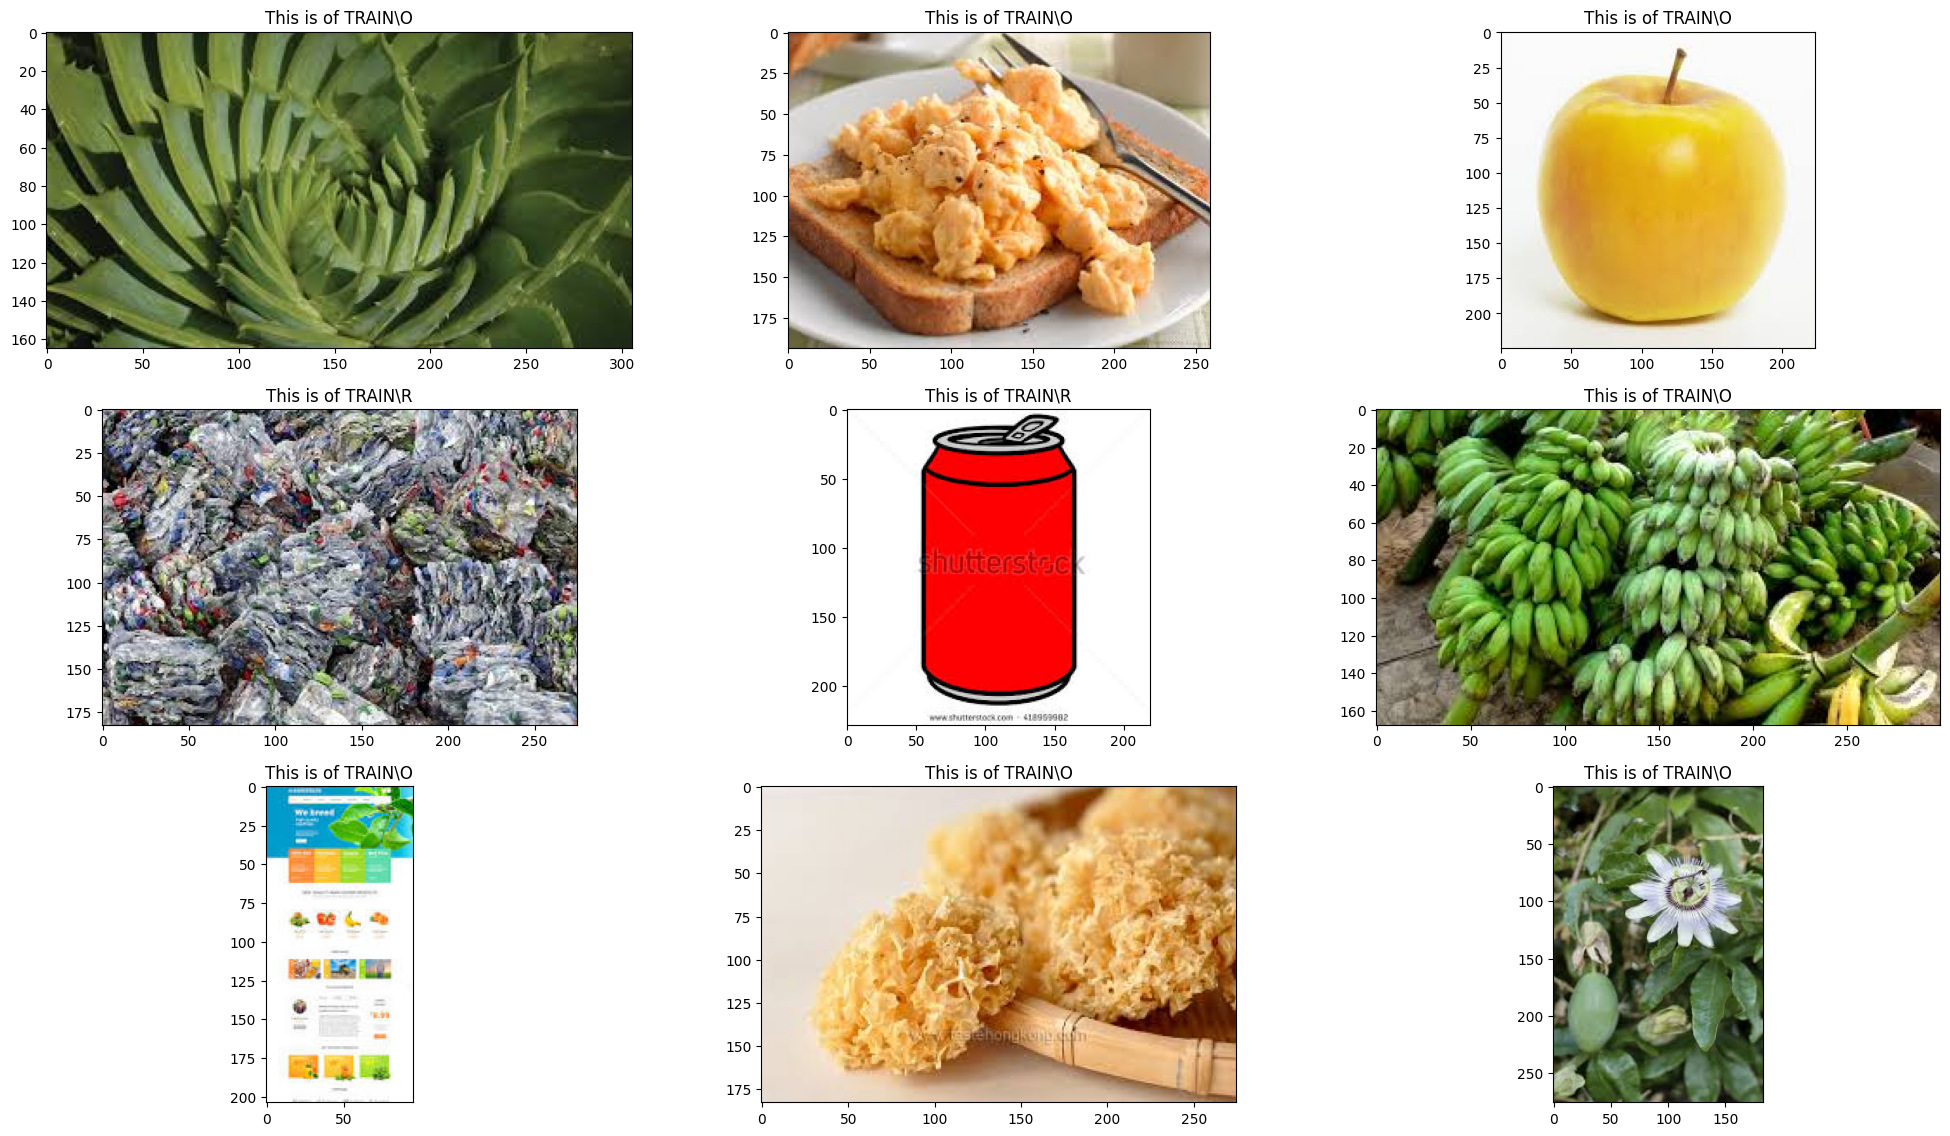

In [17]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [19]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
batch_size = 256


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [35]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [38]:
hist = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator)

Epoch 1/10


89/89 [==============================] - 616s 7s/step - loss: 0.5192 - accuracy: 0.7643 - val_loss: 0.3349 - val_accuracy: 0.8822
Epoch 2/10
89/89 [==============================] - 509s 6s/step - loss: 0.3906 - accuracy: 0.8422 - val_loss: 0.3069 - val_accuracy: 0.8727
Epoch 3/10
89/89 [==============================] - 598s 7s/step - loss: 0.3629 - accuracy: 0.8561 - val_loss: 0.3175 - val_accuracy: 0.8643
Epoch 4/10
89/89 [==============================] - 627s 7s/step - loss: 0.3311 - accuracy: 0.8659 - val_loss: 0.2830 - val_accuracy: 0.8886
Epoch 5/10
89/89 [==============================] - 695s 8s/step - loss: 0.3014 - accuracy: 0.8799 - val_loss: 0.3079 - val_accuracy: 0.8723
Epoch 6/10
89/89 [==============================] - 586s 7s/step - loss: 0.2773 - accuracy: 0.8934 - val_loss: 0.3070 - val_accuracy: 0.8834
Epoch 7/10
89/89 [==============================] - 653s 7s/step - loss: 0.2361 - accuracy: 0.9082 - val_loss: 0.3058 - val_accuracy: 0.8834
Epoch 8/10


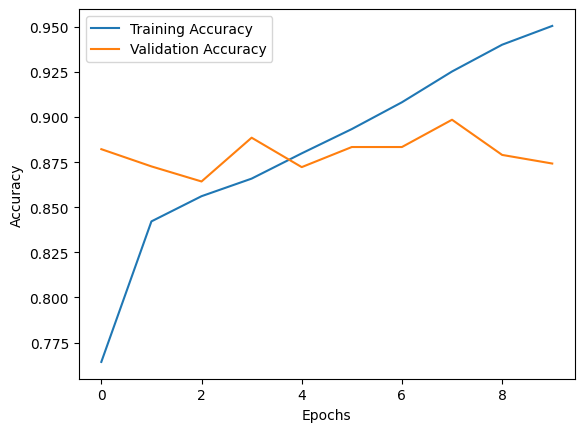

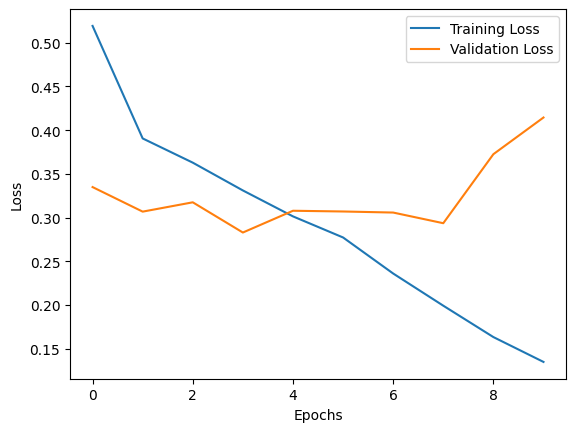

In [39]:
#Self
import matplotlib.pyplot as plt

# Plot Accuracy
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [40]:
#Self
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get true labels and predicted labels
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

10/10 [==============================] - 28s 3s/step
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.65      0.60      1401
           1       0.45      0.36      0.40      1112

    accuracy                           0.52      2513
   macro avg       0.51      0.51      0.50      2513
weighted avg       0.51      0.52      0.52      2513

Confusion Matrix:
 [[912 489]
 [707 405]]


10/10 [==============================] - 11s 1s/step


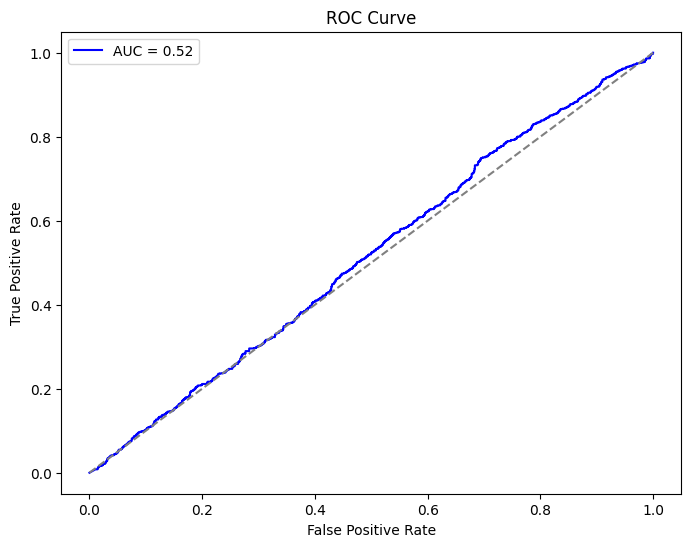

In [41]:
#Self
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model.predict(test_generator)[:, 1]  # Get probability scores
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [42]:
#Self
from keras import backend as K

def get_model_memory_size(model):
    trainable_params = np.sum([K.count_params(p) for p in model.trainable_weights])
    non_trainable_params = np.sum([K.count_params(p) for p in model.non_trainable_weights])
    total_size = (trainable_params + non_trainable_params) * 4 / (1024 ** 2)  # Convert bytes to MB
    return f"Model Memory Size: {total_size:.2f} MB"

print(get_model_memory_size(model))

Model Memory Size: 84.92 MB


In [43]:
import pandas as pd

history_df = pd.DataFrame(hist.history)
history_df.to_csv('training_history.csv', index=False)
print("Training history saved to training_history.csv")

Training history saved to training_history.csv
